In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('credit-card-default.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
# Let's understand the type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [8]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df.drop('defaulted',axis = 1)

# Putting response variable to y
y = df['defaulted']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30000, 24), (30000,), (21000, 24), (9000, 24), (21000,), (9000,))

In [10]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [12]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [13]:
# Making predictions
y_pred = rfc.predict(X_test)

In [16]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Let's check the report of our default model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7058
           1       0.65      0.36      0.46      1942

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



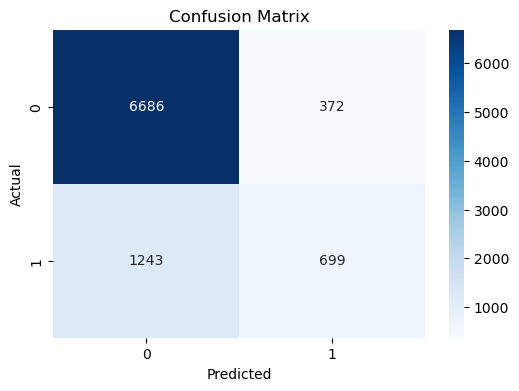

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
print(accuracy_score(y_test, y_pred))

0.8205555555555556


In [22]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, scoring='accuracy')

In [24]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.630252,0.374842,0.028678,0.014645,2,{'max_depth': 2},0.800476,0.803571,0.798095,0.795000,0.799524,0.799333,0.002815,4
1,3.431276,0.102425,0.039081,0.003283,7,{'max_depth': 7},0.815000,0.818333,0.817857,0.814524,0.815476,0.816238,0.001553,2
2,5.517341,0.225413,0.059371,0.002843,12,{'max_depth': 12},0.814524,0.819286,0.820952,0.815238,0.817381,0.817476,0.002412,1
3,7.147893,0.430999,0.107830,0.030674,17,{'max_depth': 17},0.814286,0.817143,0.820952,0.808810,0.814286,0.815095,0.003983,3


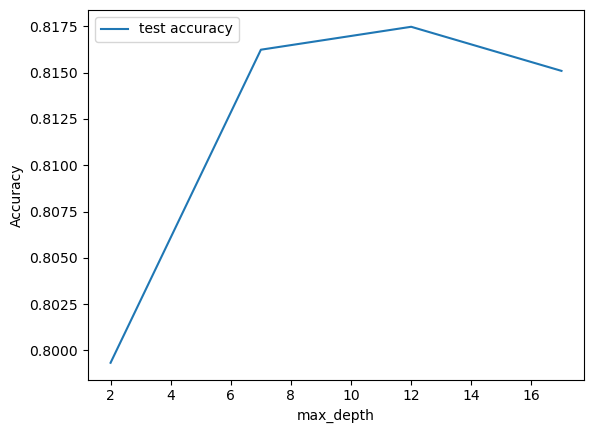

In [26]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv('credit-card-default.csv')

# Feature selection
X = df.drop('defaulted', axis = 1)
y = df['defaulted']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Define hyperparameter grid
param_grids = {
    "Decision Tree": {
        'max_depth': [4, 8, 10],
        'min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [4, 8, 10],
        'max_features': [5, 10]
    },
    "kNN": {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }
}

# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "kNN": KNeighborsClassifier()
}

# Store results
results = {
    "Accuracy": {},
    "Precision": {},
    "Recall": {},
    "F1 Score": {}
}
conf_matrices = []
model_names = []

# Perform Grid Search, Train, Predict, and Evaluate
for name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)  # Train model with hyperparameter tuning
    best_model = grid_search.best_estimator_  # Get best model
    y_pred = best_model.predict(X_test)  # Make predictions
    
    # Compute evaluation metrics
    results["Accuracy"][name] = accuracy_score(y_test, y_pred)
    results["Precision"][name] = precision_score(y_test, y_pred)
    results["Recall"][name] = recall_score(y_test, y_pred)
    results["F1 Score"][name] = f1_score(y_test, y_pred)
    
    # Compute confusion matrix
    conf_matrices.append(confusion_matrix(y_test, y_pred))
    model_names.append(name)

# Plot all confusion matrices in one row
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, ax in enumerate(axes):
    sns.heatmap(conf_matrices[i], annot=True, cmap='Blues', fmt='g', ax=ax)
    ax.set_title(f'{model_names[i]} - Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
plt.show()

# Display evaluation metric comparisons
comparison_df = pd.DataFrame(results)
print(comparison_df)
